In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

print("Start CIF downloading...")

with MPRester("kljjGo7W1D4tHy5OZy") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-567290")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-567290")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-567290")

    CifWriter(structure,0.1,write_magmoms=False).write_file("LaN_mp-567290_symmetrized.cif")
    print("Downloading completed")

Start CIF downloading...


# Diffraction par rayons X

La radiocristallographie est une technique permettant de déterminer les positions des différents atomes de la structure cristalline. Celle-ci est fondée sur les phénomènes d’interférences et sur la diffraction par rayons X. Sur base de la loi de Bragg, on obtient un diffractogramme nous indiquant le positionnement des pics de diffraction en fonction des angles $2\theta$

$$2d_{hkl}\sin{\theta} = \lambda \hspace{2cm} avec\hspace{2mm} \lambda = 1.5406 A^° $$

où $\lambda$ est la longueur d’onde du rayon indicent et $d_{hkl}$ est la distance inter-planaire pour la famille de plans (hkl).

On détermine cette distance par :  $$d_{hkl} = \frac{2\pi}{\mid K \mid}$$

où $K = a_{1}^*h + a_{2}^*k + a_{3}^*l$ avec $h$, $k$, $l$ $\in$ $\mathbb{Z}$ est un vecteur du réseau réciproque. L’intensité des pics de diffraction peut être établit en proportionnalité par la relation :
 
$$I \propto \mid S_K\mid^2$$
 
où $S_K$ est le facteur de structure de maille:
 
$$S_K = \sum_{j=1}^N f_{j}(K)e^{iK \cdot r_{j}'}$$
 
Cette somme des ondes diffusées va donc pouvoir se décomposer en une partie due au réseau et une autre due à la maille. $f_{j}(K)$ correspond au facteur de forme atomique.

 Pour appliquer au $LaN$, on a:
 
 $$K = a_{1}^*h + a_{2}^*k + a_{3}^*l = 2\pi h (\frac{1}{a},\frac{-1}{\sqrt{3}a},0) + 2\pi k (\frac{1}{a},\frac{1}{\sqrt{3}a},0) + 2\pi l (0,0,\frac{1}{c}) $$
 
La distance interplanaire $d_{hkl}$ est donc:
 
 $$d_{hkl} = \frac{2\pi}{\mid K \mid} $$
 
Dans la cellule primitive du $LaN$, il y a un deux atomes de $La$ et deux atome de $N$ aux positions suivantes, exprimées en coordonnées réduites par rapport aux vecteurs de base: 
 
 $$r_{La1} = (0.3333,0.6667,0.9987)$$
 $$r_{La2} = (0.6667,0.3333,0.4987)$$
 $$r_{N1} = (0.3333,0.6667,0.4113)$$
 $$r_{N2} = (0.6667,0.3333,0.9113)$$
 

Grâce à ces vecteurs, on peut calculer le facteur de structure de la maille $S_K$ :
 
 $$K\cdot r_{La1} $$
 $$K\cdot r_{La2} $$
 $$K\cdot r_{N1}   $$
 $$K\cdot r_{N2}  $$
 
 
$$S_K = f_{La1}(K) e^{K\cdot r_{La1}} + f_{La2}(K) e^{K\cdot r_{La2}} + f_{N1}(K) e^{K\cdot r_{N1}} + f_{N2}(K) e^{K\cdot r_{N2}}$$
 
 
où les facteurs de forme atomiques sont approximés par le nombre atomique Z de chacun des atomes: $f_{La1,2}(K) = 57$ et $f_{N1,2}(K) = 7$.

Sur base de ces relations, il est possible de calculer pour tout vecteur $K$ le facteur de proportionnalité de l’intensité et l’angle de diffraction. Les résultats, obtenus à l'aide de notre code (voir ci-après) sont fournis dans le tableau ci-dessous:

| (h,k,l) | $\theta$ | $2\theta$ | $O(I)$ |
| --------- | -------- | --------- | ------ |
| (1,0,0)  | 12.4279 |24.8559|13902|
| (1,0,1) | 14.539 |29.078|15359|
| (0,0,2)  | 14.9805 |29.9611|12198|


Les valeurs obtenues théoriquement sont en accord avec les donnés fournies par le Materials Project (voir figure 1).  Cependant, on remarque que les indices utilisés sur ce graphe sont exprimés selon les 4 coordonnées de Miller. Celles-ci sont de la forme $(h,k,i,l)$ où i est dit redondant car les trois indices $h$, $k$ et $l$ suffisent à eux seuls à définir un plan. Il est défini comme $i=-h-k$.

## Figure 1 

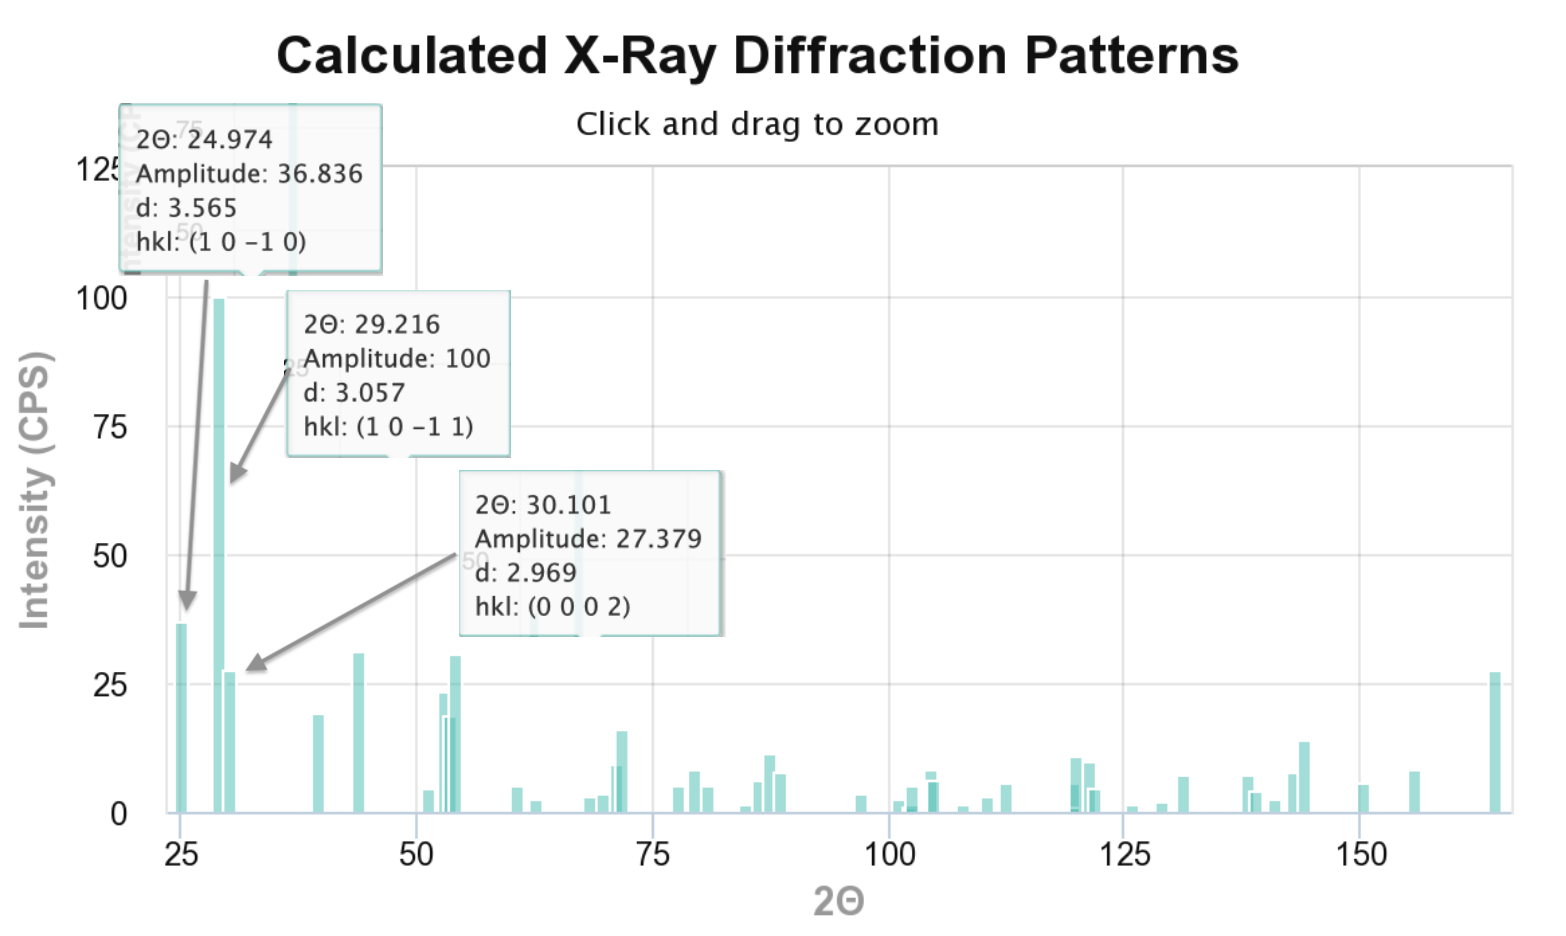

In [1]:
from IPython.display import Image
Image(filename="lmapr1492/chart.png")

## Code utilisé

<pre>
  <code>

function [Int,theta,Twotheta] = LaN(h,k,l)

   a = 4.133;
   c = 5.96;

   lambda = 1.5406;

   La = 57;
   N = 7;

   r_La1 = [0.3333,0.6667,0.9987];
   r_La2 = [0.6667,0.3333,0.4987];
   r_N1 = [0.3333,0.6667,0.4113];
   r_N2 = [0.6667,0.3333,0.9113];
   
   Omega = 88.167;

   A1 = [a/2,-((sqrt(3)*a)/2),0];
   A2 = [a/2,(sqrt(3)*a)/2,0];
   A3 = [0,0,c];

   a_1r = cross(A2,A3) .* ((2*pi)/Omega);
   a_2r = cross(A3,A1) .* ((2*pi)/Omega);
   a_3r = cross(A1,A2) .* ((2*pi)/Omega);

   K = a_1r .* h + a_2r .* k + a_3r .* l;

   d_hkl = (2*pi)/norm(K);

   K_La1 = K*r_La1';
   K_La2 = K*r_La2';
   K_N1 = K*r_N1';
   K_N2 = K*r_N2';

   S_K = La * exp(1i*K_La1) + La * exp(1i*K_La2) + N * exp(1i*K_N2) + N * exp(1i*K_N1);

   Int = (norm(S_K))^2

   theta = asin(lambda/(2*d_hkl))*(180/pi)
   Twotheta = 2*theta

end

  </code>
</pre>